# 1.- Load libraries

In [1]:
from influxdb import DataFrameClient
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 
import requests 
from datetime import datetime
import time

# 2.- Prepare Database

In [2]:
client = DataFrameClient('localhost', 8086, 'root', 'root')

In [3]:
client.get_list_database()

[{'name': '_internal'},
 {'name': 'Market'},
 {'name': 'difBook'},
 {'name': 'demo'},
 {'name': 'Markets'}]

In [4]:
client.switch_database("Markets")

In [5]:
client.get_list_measurements()

[{'name': 'Book'}, {'name': 'Price'}, {'name': 'difBook'}]

In [6]:
points = client.query("SELECT * FROM Price WHERE time > '2020-04-25 22:00:00'")

Check times. For future analysis, we have to take the differences into account

In [7]:
# Time checks
response = requests.get('https://api.kraken.com/0/public/Time')
print("Kraken Time:   " + datetime.fromtimestamp(response.json()["result"]["unixtime"]).strftime('%Y-%m-%d %H:%M:%S.%f'))
print("Computer Time: " + str(datetime.fromtimestamp(time.time())))
print("------------------------------------------------------------------")

response = requests.get('https://api.huobi.pro/v1/common/timestamp')
print("Huobi Time:    " + datetime.fromtimestamp(response.json()["data"]/1000).strftime('%Y-%m-%d %H:%M:%S.%f'))
print("Computer Time: " + str(datetime.fromtimestamp(time.time())))
print("------------------------------------------------------------------")

response = requests.get('https://api.pro.coinbase.com/time')
print("Coinbase Time: " + response.json()["iso"])
print("Computer Time: " + str(datetime.fromtimestamp(time.time())))
print("------------------------------------------------------------------")

response = requests.get('https://www.bitstamp.net/api/ticker/')
print("Bitstamp Time: " + datetime.fromtimestamp(int(response.json()["timestamp"])).strftime('%Y-%m-%d %H:%M:%S.%f'))
print("Computer Time: " + str(datetime.fromtimestamp(time.time())))
print("------------------------------------------------------------------")

response = requests.get('https://global-openapi.bithumb.pro/openapi/v1/serverTime')
print("Bithumb Time:  " + datetime.fromtimestamp(response.json()["timestamp"]/1000).strftime('%Y-%m-%d %H:%M:%S.%f'))
print("Computer Time: " + str(datetime.fromtimestamp(time.time())))
print("------------------------------------------------------------------")

response = requests.get('https://api.kraken.com/0/public/Time')
print("Kraken Time:   " + datetime.fromtimestamp(response.json()["result"]["unixtime"]).strftime('%Y-%m-%d %H:%M:%S.%f'))
print("Computer Time: " + str(datetime.fromtimestamp(time.time())))
print("------------------------------------------------------------------")

response = requests.get('https://api-pub.bitfinex.com/v2/status/deriv?keys=tBTCF0:USTF0')
print("Bitfinex Time: " + str(datetime.fromtimestamp(response.json()[0][1]/1000)))
print("Computer Time: " + str(datetime.fromtimestamp(time.time())))
print("------------------------------------------------------------------")

response = requests.get('https://api.binance.com/api/v1/time')
print("Binance Time:  " + datetime.fromtimestamp(response.json()["serverTime"]/1000).strftime('%Y-%m-%d %H:%M:%S.%f'))
print("Computer Time: " + str(datetime.fromtimestamp(time.time())))

Kraken Time:   2020-04-27 15:55:59.000000
Computer Time: 2020-04-27 15:55:59.051475
------------------------------------------------------------------
Huobi Time:    2020-04-27 15:56:00.118000
Computer Time: 2020-04-27 15:55:59.628904
------------------------------------------------------------------
Coinbase Time: 2020-04-27T13:56:00.487Z
Computer Time: 2020-04-27 15:55:59.929247
------------------------------------------------------------------
Bitstamp Time: 2020-04-27 15:55:58.000000
Computer Time: 2020-04-27 15:56:00.166111
------------------------------------------------------------------
Bithumb Time:  2020-04-27 15:56:01.731000
Computer Time: 2020-04-27 15:56:01.209129
------------------------------------------------------------------
Kraken Time:   2020-04-27 15:56:03.000000
Computer Time: 2020-04-27 15:56:01.599096
------------------------------------------------------------------
Bitfinex Time: 2020-04-27 15:55:59
Computer Time: 2020-04-27 15:56:01.838321
-------------------

# Trades

In [8]:
points["Price"]

,Host,Pair,Price,Q,Write_Time
2020-04-25 22:00:00.011000064+00:00,Binance,ethbtc,0.025725,0.208000,2020-04-25 21:59:59.118000
2020-04-25 22:00:00.635000064+00:00,Binance,ethbtc,0.025725,7.534000,2020-04-25 21:59:59.729000
2020-04-25 22:00:00.975000064+00:00,Kraken,ethbtc,0.025710,0.000012,2020-04-25 22:00:00.060000
2020-04-25 22:00:01.100000+00:00,Binance,ethbtc,0.025727,0.058000,2020-04-25 22:00:00.193000
2020-04-25 22:00:01.427000064+00:00,Kraken,ethbtc,0.025700,0.000012,2020-04-25 22:00:00.492000
...,...,...,...,...,...
2020-04-25 22:31:28.753999872+00:00,Binance,ethbtc,0.025726,0.069000,2020-04-25 22:31:27.830000
2020-04-25 22:31:28.764000+00:00,Binance,ethbtc,0.025727,0.261000,2020-04-25 22:31:27.881000
2020-04-25 22:31:31.654000128+00:00,Huobi,ethbtc,0.025728,0.395100,2020-04-25 22:31:30.729000
2020-04-25 22:31:31.859000064+00:00,Binance,ethbtc,0.025726,0.167000,2020-04-25 22:31:30.931000


In [9]:
#1.- Check for duplicates
dup_number = np.sum(points["Price"].iloc[:,0:4].reset_index().duplicated())

In [10]:
if dup_number != 0:
    points["Price"][points["Price"].iloc[:,0:4].reset_index().duplicated()]
else:
    print("No duplicates")

No duplicates


In [11]:
#1.- Check that every exchange is present
# df = points["Price"]
# df_group = df.groupby(['Host'])["Price"]
# for key, item in df_group:
#     print(df_group.get_group(key), "\n\n")
np.unique(points["Price"]["Host"])

array(['Binance', 'Bithumb', 'Huobi', 'Kraken'], dtype=object)

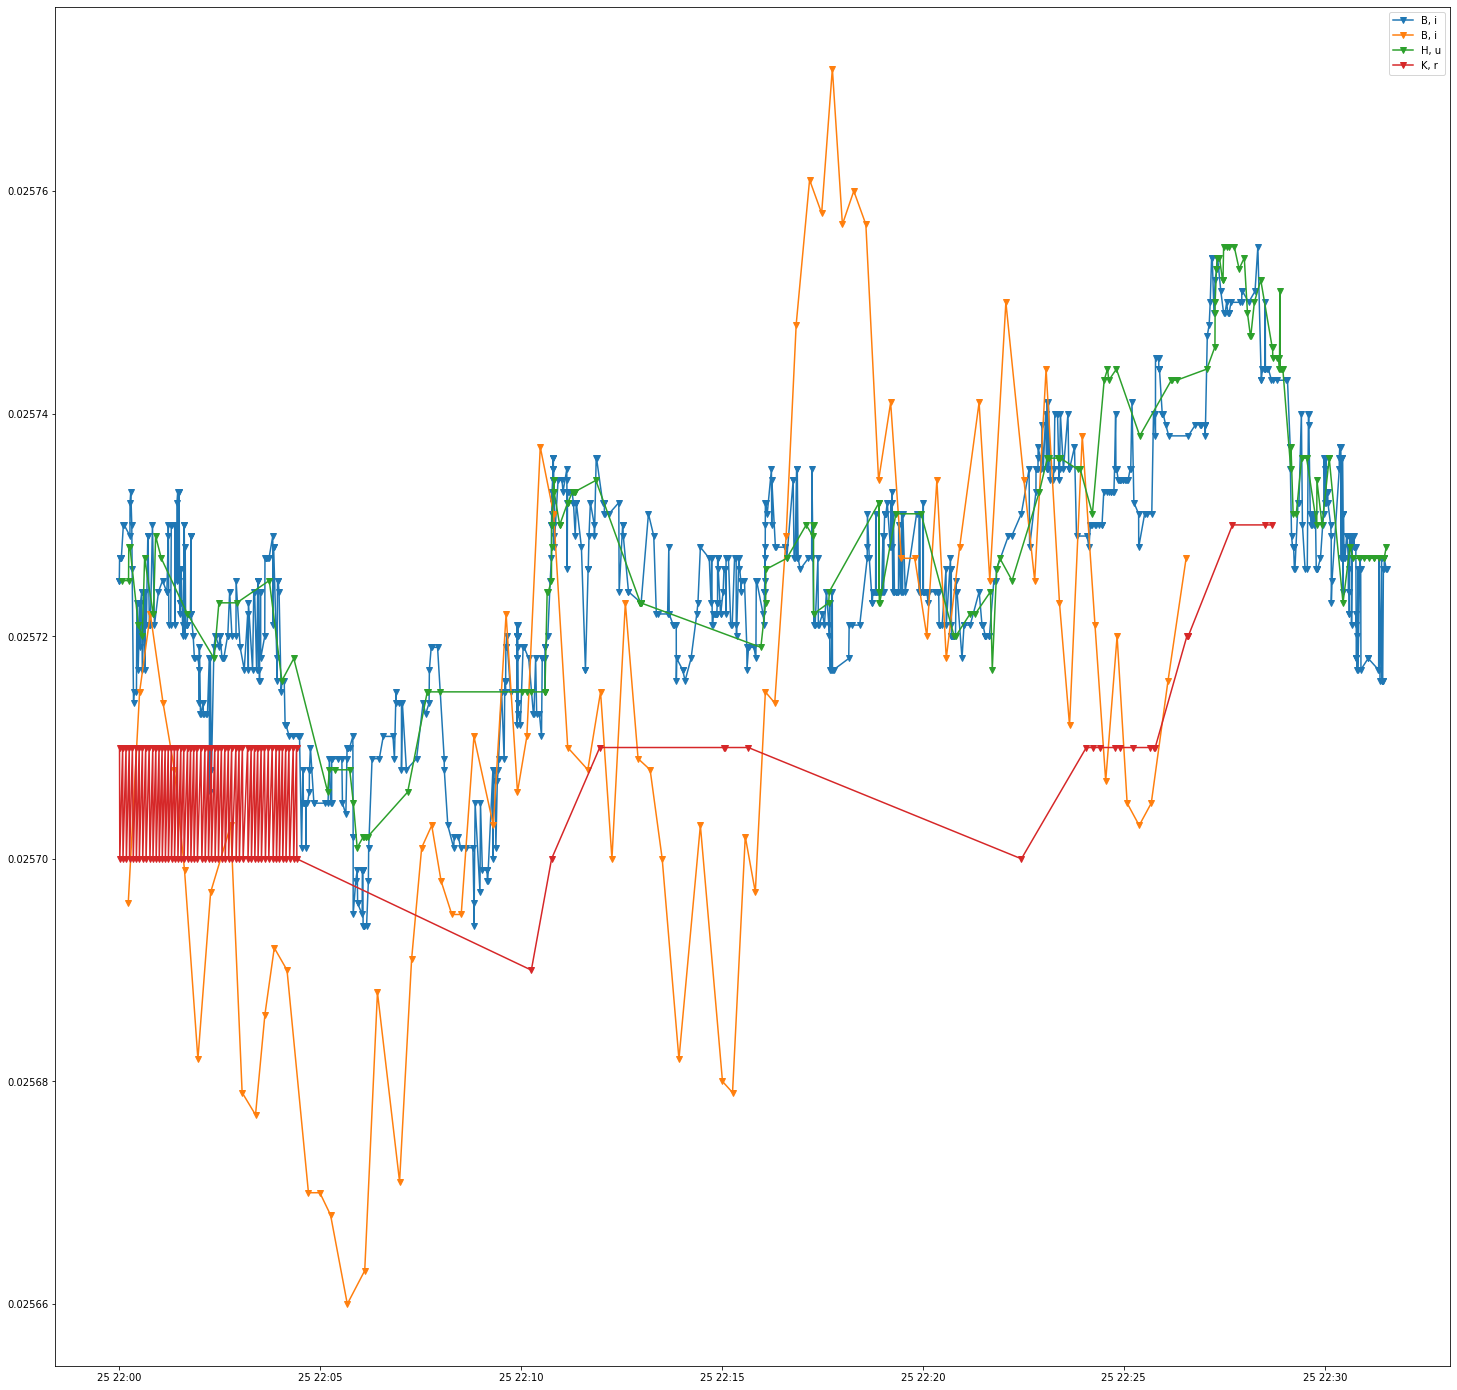

In [13]:
# Print last trades prices 
# by_date = df.groupby(df.index.date)[['value']].mean()
df = points["Price"]
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (20,20)
for k,g in df.groupby(['Host'])['Price']:
    ax.plot_date(pd.to_datetime(g.index),g,'v-',label="{}, {}".format(*k))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

In [15]:
df[df["Host"] == "Binance"].groupby(pd.Grouper(freq = "ms")).mean().fillna(method = "ffill")

,Price,Q
2020-04-25 22:00:00.011000+00:00,0.025725,0.208
2020-04-25 22:00:00.012000+00:00,0.025725,0.208
2020-04-25 22:00:00.013000+00:00,0.025725,0.208
2020-04-25 22:00:00.014000+00:00,0.025725,0.208
2020-04-25 22:00:00.015000+00:00,0.025725,0.208
...,...,...
2020-04-25 22:31:32.923000+00:00,0.025726,0.167
2020-04-25 22:31:32.924000+00:00,0.025726,0.167
2020-04-25 22:31:32.925000+00:00,0.025726,0.167
2020-04-25 22:31:32.926000+00:00,0.025726,0.167


In [48]:
df2 = df[df["Host"] == exchanges[0]].groupby(pd.Grouper(freq = "ms")).agg({"Price":[np.mean],"Q":[np.sum]}).fillna(method = "ffill")
df2

,Price,Q
,mean,sum
2020-04-25 22:00:00.011000+00:00,0.025725,0.208
2020-04-25 22:00:00.012000+00:00,0.025725,0.000
2020-04-25 22:00:00.013000+00:00,0.025725,0.000
2020-04-25 22:00:00.014000+00:00,0.025725,0.000
2020-04-25 22:00:00.015000+00:00,0.025725,0.000
...,...,...
2020-04-25 22:31:32.923000+00:00,0.025726,0.000
2020-04-25 22:31:32.924000+00:00,0.025726,0.000
2020-04-25 22:31:32.925000+00:00,0.025726,0.000


In [129]:
# df2 = df[df["Host"] == "Binance"].groupby(pd.Grouper(freq = "ms")).agg([np.mean, np.max,np.min]).fillna(method = "ffill")
exchanges = np.unique(points["Price"]["Host"])
df2 = df[df["Host"] == exchanges[0]].groupby(pd.Grouper(freq = "ms")).agg({"Price":[np.mean],"Q":[np.sum]}).fillna(method = "ffill")
df2.columns = df2.columns.droplevel(level = 0)
df2 = df2.rename(columns = {"mean": "Price Binance", "sum": "Q Binance"})
for i in exchanges[1::]:
    dft = df[df["Host"] == i].groupby(pd.Grouper(freq = "ms")).agg({"Price":[np.mean],"Q":[np.sum]}).fillna(method = "ffill")
    df2[["Price " + i, "Q "+i]] = dft[["Price", "Q"]]
df2.update(df2[["Price Binance", "Price Bithumb", "Price Huobi", "Price Kraken"]].ffill().bfill())
df2.update(df2[["Q Binance", "Q Bithumb", "Q Huobi", "Q Kraken"]].fillna(0))

In [130]:
df2

,Price Binance,Q Binance,Price Bithumb,Q Bithumb,Price Huobi,Q Huobi,Price Kraken,Q Kraken
2020-04-25 22:00:00.011000+00:00,0.025725,0.208,0.025696,0.0,0.025725,0.0,0.02571,0.0
2020-04-25 22:00:00.012000+00:00,0.025725,0.000,0.025696,0.0,0.025725,0.0,0.02571,0.0
2020-04-25 22:00:00.013000+00:00,0.025725,0.000,0.025696,0.0,0.025725,0.0,0.02571,0.0
2020-04-25 22:00:00.014000+00:00,0.025725,0.000,0.025696,0.0,0.025725,0.0,0.02571,0.0
2020-04-25 22:00:00.015000+00:00,0.025725,0.000,0.025696,0.0,0.025725,0.0,0.02571,0.0
...,...,...,...,...,...,...,...,...
2020-04-25 22:31:32.923000+00:00,0.025726,0.000,0.025727,0.0,0.025728,0.0,0.02573,0.0
2020-04-25 22:31:32.924000+00:00,0.025726,0.000,0.025727,0.0,0.025728,0.0,0.02573,0.0
2020-04-25 22:31:32.925000+00:00,0.025726,0.000,0.025727,0.0,0.025728,0.0,0.02573,0.0
2020-04-25 22:31:32.926000+00:00,0.025726,0.000,0.025727,0.0,0.025728,0.0,0.02573,0.0


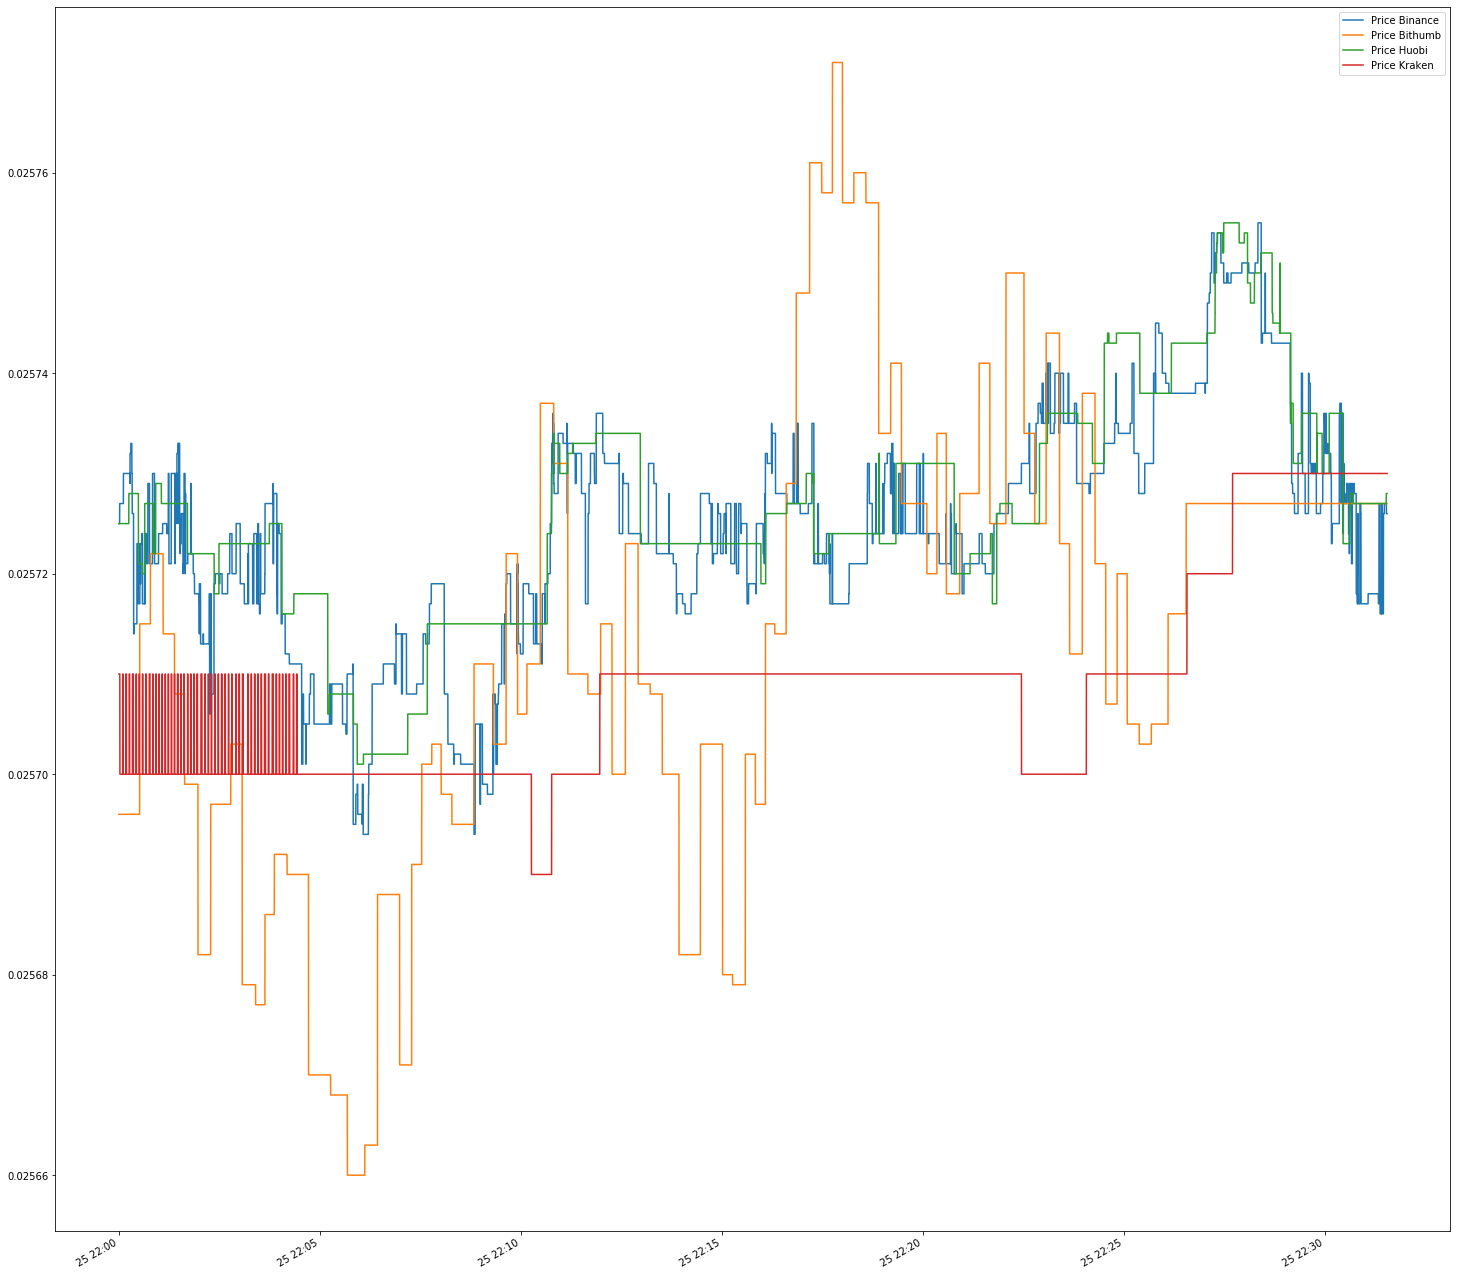

In [131]:
df2[["Price Binance", "Price Bithumb", "Price Huobi", "Price Kraken"]].plot()

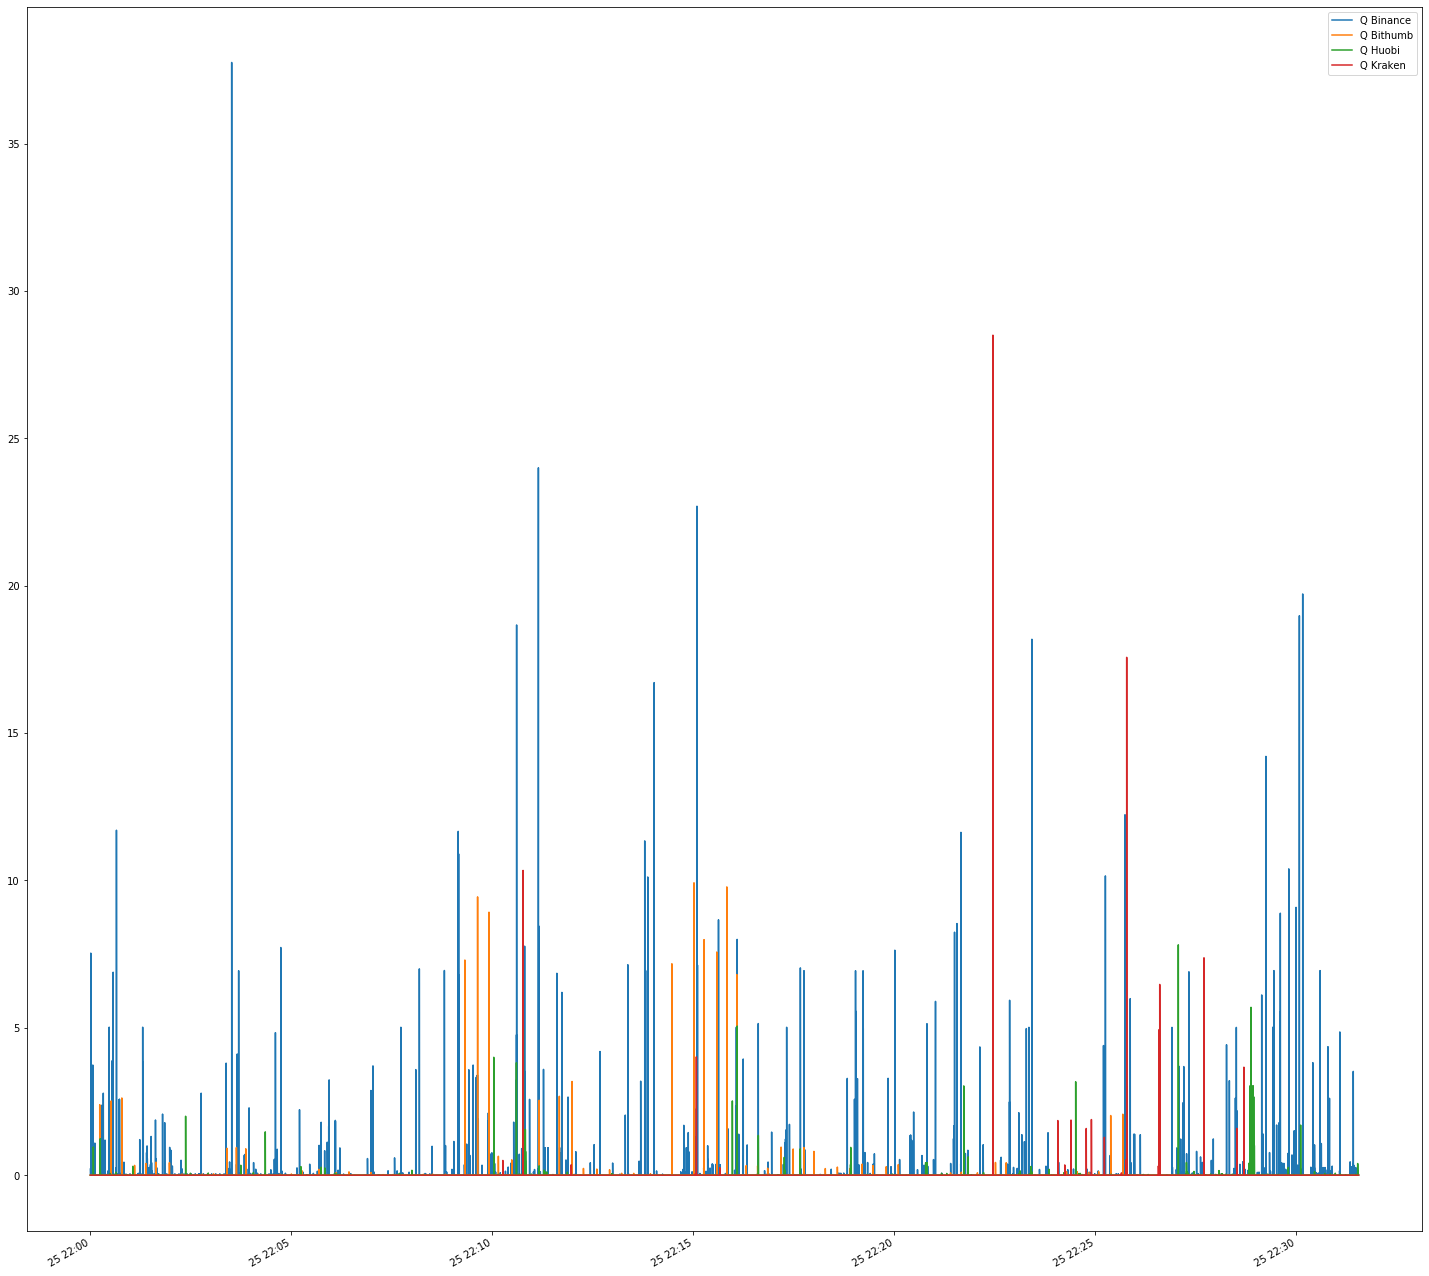

In [132]:
df2[["Q Binance", "Q Bithumb", "Q Huobi", "Q Kraken"]].plot()

From here I'm thinking in computing different price differences metrics (Maximum difference over intervals, voulmes...)
Maybe an LSTM using the previous data of last trades to predict 

# Check order books

In [137]:
# Remove possible duplicates
points_book = client.query("SELECT * FROM Book WHERE time > '2020-04-24 22:00:00'")
points["Book"]

,Asks,Bids,Host,LastUpdateID,Pair
2020-04-25 21:30:37.814000128+00:00,"[['0.02576782', '19.10961664'], ['0.02576802',...","[['0.02571903', '20.57350000'], ['0.02571652',...",Bitstamp,1587843038692636,ethbtc
2020-04-25 21:30:37.974000128+00:00,"[['0.02576782', '19.10961664'], ['0.02576802',...","[['0.02571903', '20.57350000'], ['0.02571652',...",Bitstamp,1587843038944356,ethbtc
2020-04-25 21:30:38.471000064+00:00,"[['0.0258760000', '0.402247'], ['0.0260060000'...","[['0.0256110000', '0.413379'], ['0.0254820000'...",Bithumb,1587843039308,ethbtc
2020-04-25 21:30:38.800999936+00:00,"[['0.02576782', '19.10961664'], ['0.02576802',...","[['0.02571903', '20.57350000'], ['0.02571652',...",Bitstamp,1587843039723862,ethbtc
2020-04-25 21:30:38.868000+00:00,"[[44169741278, 0.025752, -13.64618217], [44169...","[[44169690728, 0.025734, 5.23084637], [4416976...",Bitfinex,53839,ethbtc
...,...,...,...,...,...
2020-04-25 22:31:27.524999936+00:00,"[[0.025727, 2.0], [0.025728, 7.7762], [0.02572...","[[0.02572, 5.7402], [0.025719, 0.6801], [0.025...",Huobi,1587846688462,ethbtc
2020-04-25 22:31:28.528999936+00:00,"[[0.025728, 7.7762], [0.025729, 8.1927], [0.02...","[[0.02572, 5.7402], [0.025719, 0.6801], [0.025...",Huobi,1587846689467,ethbtc
2020-04-25 22:31:29.536000+00:00,"[[0.025728, 7.7762], [0.025729, 8.1927], [0.02...","[[0.02572, 5.7402], [0.025719, 0.6801], [0.025...",Huobi,1587846690471,ethbtc
2020-04-25 22:31:30.540999936+00:00,"[[0.025728, 7.7762], [0.025729, 8.1927], [0.02...","[[0.02572, 5.7402], [0.025719, 0.6801], [0.025...",Huobi,1587846691477,ethbtc


In [138]:
np.unique(points_book["Book"]["Host"])

array(['Binance', 'BitFlyer', 'Bitfinex', 'Bithumb', 'Bitstamp',
       'Coinbase', 'Huobi', 'Kraken'], dtype=object)

In [145]:
#Check for duplicates
dup_number = np.sum(points_book["Book"].reset_index().duplicated())
if dup_number != 0:
    points["Book"][points_book["Book"].reset_index().duplicated()]
else:
    print("No duplicates")

No duplicates


In [146]:
points_dif = client.query("SELECT * FROM difBook WHERE time > '2020-04-24 22:00:00'")

dup_number = np.sum(points_dif["difBook"].reset_index().duplicated())

if dup_number != 0:
    points_dif["difBook"][points_dif["difBook"].reset_index().duplicated()]
else:
    print("No duplicates")

No duplicates


In [148]:
np.unique(points_dif["difBook"]["Host"])
# Huobi is not here because we are gathering the order book by second in the previous table.
# It was way too messy to try to gather the differential order book. I will do it if I have spare time only.

array(['Binance', 'BitFlyer', 'Bitfinex', 'Bithumb', 'Bitstamp',
       'Coinbase', 'Kraken'], dtype=object)

Exploring Binance OrderBook

In [158]:
dfT = points_book["Book"]
d = dfT[dfT["Host"] == "Binance"]

In [208]:
d

,Asks,Bids,Host,LastUpdateID,Pair
2020-04-25 21:30:48.841999872+00:00,"[['0.02573800', '5.56400000'], ['0.02573900', ...","[['0.02573600', '0.84800000'], ['0.02573500', ...",Binance,1171096857,ethbtc
2020-04-25 21:30:59.183000064+00:00,"[['0.02573700', '0.00900000'], ['0.02574000', ...","[['0.02573400', '0.33700000'], ['0.02573300', ...",Binance,1171097039,ethbtc
2020-04-25 21:31:09.620000+00:00,"[['0.02572900', '0.55700000'], ['0.02573000', ...","[['0.02571700', '1.44200000'], ['0.02571600', ...",Binance,1171097527,ethbtc
2020-04-25 21:31:19.985999872+00:00,"[['0.02573100', '0.71400000'], ['0.02573200', ...","[['0.02572400', '24.40900000'], ['0.02572300',...",Binance,1171097818,ethbtc
2020-04-25 21:31:30.320999936+00:00,"[['0.02573500', '1.32100000'], ['0.02573800', ...","[['0.02573200', '1.64500000'], ['0.02573100', ...",Binance,1171098021,ethbtc


In [160]:
import ast
d.iloc[:,0].apply(lambda x: [[float(j) for j in i] for i in x])

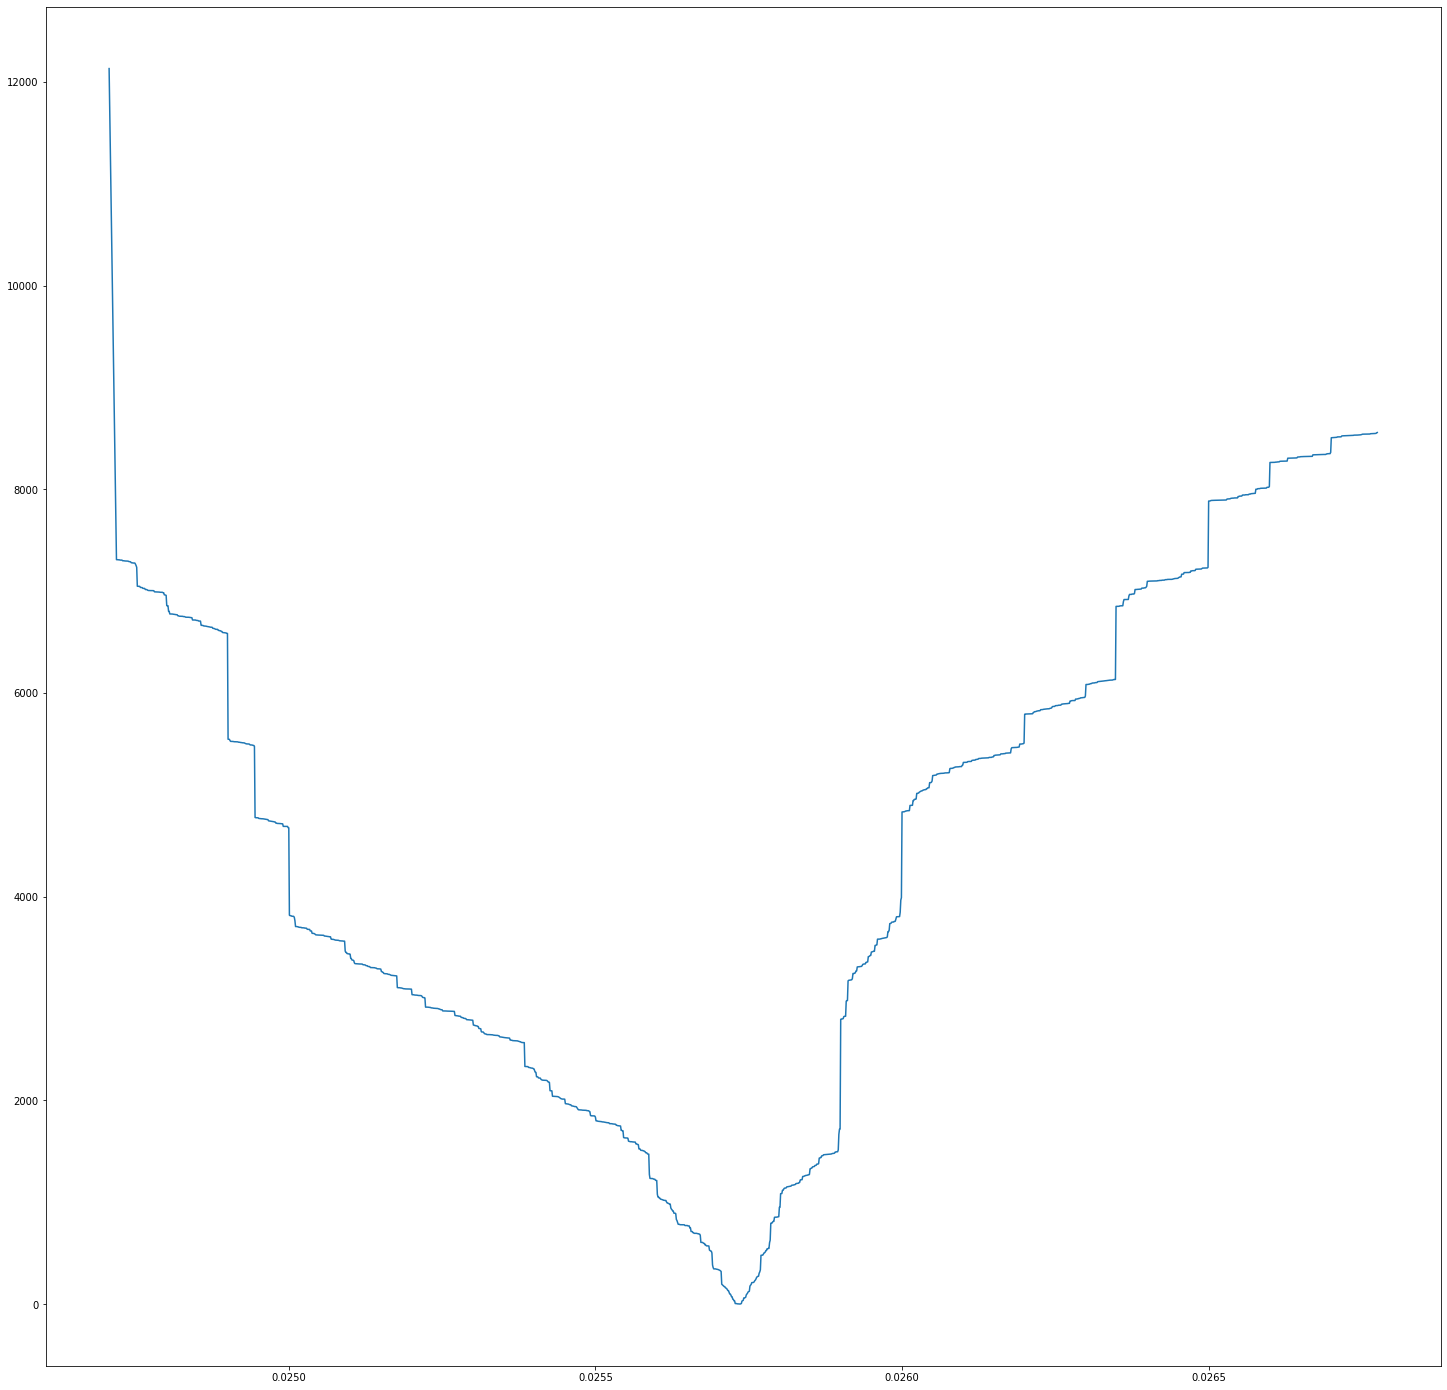

In [207]:
bids = d.iloc[:,0].apply(lambda x: [[float(j) for j in i] for i in ast.literal_eval(x)])[0]
asks = d.iloc[:,1].apply(lambda x: [[float(j) for j in i] for i in ast.literal_eval(x)])[0]
# print(bids)
# print("ASKS")
# print(asks)
price_b = [bids[i][0] for i in range(len(bids))]
price_a = [asks[-(i+1)][0] for i in range(len(asks))]
# print("PRICESS")
# print(price_b)
price = price_a + price_b

freq_b = np.cumsum([bids[i][1] for i in range(len(bids))]).tolist()
freq_a = np.cumsum([asks[i][1] for i in range(len(asks))])[::-1].tolist()

freq = freq_a + freq_b
plt.plot(price,freq)

In [152]:
df = points_dif["difBook"]
df[df["Host"] == "Binance"]

,Asks,Bids,Host,Pair,Seg
2020-04-25 21:30:43.100000+00:00,"[['0.02574300', '0.00500000'], ['0.02575200', ...","[['0.02572800', '0.08800000'], ['0.02572700', ...",Binance,ethbtc,"[1171096786, 1171096761]"
2020-04-25 21:30:44.100000+00:00,"[['0.02573900', '24.63600000'], ['0.02574000',...","[['0.02573200', '0.00000000'], ['0.02573000', ...",Binance,ethbtc,"[1171096807, 1171096787]"
2020-04-25 21:30:47.100000+00:00,"[['0.02574800', '8.91400000'], ['0.02581300', ...","[['0.02572900', '0.00000000'], ['0.02571100', ...",Binance,ethbtc,"[1171096835, 1171096829]"
2020-04-25 21:30:50.100000+00:00,"[['0.02573700', '24.63600000'], ['0.02573900',...","[['0.02573600', '0.85300000'], ['0.02571200', ...",Binance,ethbtc,"[1171096866, 1171096854]"
2020-04-25 21:30:51.100000+00:00,"[['0.02573700', '0.00000000'], ['0.02573800', ...","[['0.02573600', '0.85300000'], ['0.02573500', ...",Binance,ethbtc,"[1171096890, 1171096867]"
...,...,...,...,...,...
2020-04-25 22:31:28.244999936+00:00,"[['0.02572600', '0.10100000'], ['0.02625400', ...","[['0.02570300', '25.54400000'], ['0.02553300',...",Binance,ethbtc,"[1171149802, 1171149795]"
2020-04-25 22:31:29.244999936+00:00,"[['0.02572600', '0.16700000'], ['0.02572700', ...","[['0.02546000', '9.33900000'], ['0.02545900', ...",Binance,ethbtc,"[1171149815, 1171149803]"
2020-04-25 22:31:30.244999936+00:00,"[['0.02731000', '0.23400000']]","[['0.02568500', '4.87500000'], ['0.02522200', ...",Binance,ethbtc,"[1171149823, 1171149816]"
2020-04-25 22:31:31.244999936+00:00,"[['0.02576800', '10.14800000'], ['0.02781600',...","[['0.02506500', '1.02500000'], ['0.02493600', ...",Binance,ethbtc,"[1171149831, 1171149824]"


The idea would be to add to the dataframe of the previous part metrics from each order book in order to train the model

In [ ]:
# Try to recompute order book
# Create the class for reconstruct
# Models??

# Statistical Tests

In [ ]:
# Do a POC with data extracted from REST for triangular, and tests.
# Calculate differences by 5 seconds interval
# 